#Library Import

In [58]:
!pip install feature_engine
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.neural_network import MLPRegressor
from feature_engine.creation import CyclicalFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_squared_log_error
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.decomposition import PCA
import tensorflow as tf
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Activation, Dropout
from keras import layers
from tensorflow.keras import regularizers
from google.colab import drive
import warnings
warnings.filterwarnings(action='ignore')
np.random.seed(44)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Data Import & Preprocessing

In [59]:
drive.mount('/content/drive/', force_remount=True)
fileName = "/content/drive/My Drive/Dataset.xlsx"
df_Labels = pd.read_excel(fileName, sheet_name="Plant_1_Data")
df_Labels = df_Labels.drop(['PLANT_ID'], axis=1)
df_Labels["DATE_TIME"] = pd.to_datetime(df_Labels.DATE_TIME)
df_Features = pd.read_excel(fileName, sheet_name="Plant_1_Sensor_Data")
df_Features = df_Features.drop(['PLANT_ID','SOURCE_KEY'], axis=1)
df_Features['DATE_TIME'] = pd.to_datetime(df_Features.DATE_TIME)
print(df_Features.head())

Mounted at /content/drive/
            DATE_TIME  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION
0 2020-05-15 00:00:00            25.184316           22.857507          0.0
1 2020-05-15 00:15:00            25.084589           22.761668          0.0
2 2020-05-15 00:30:00            24.935753           22.592306          0.0
3 2020-05-15 00:45:00            24.846130           22.360852          0.0
4 2020-05-15 01:00:00            24.621525           22.165423          0.0


In [60]:
df_Learn = pd.merge(df_Features, df_Labels, how='inner', left_on = ['DATE_TIME'], right_on = ['DATE_TIME'])

In [61]:
'''sourceKeyList = list(df_Learn['SOURCE_KEY'].unique())
sourceKeyDict = {}
for key in sourceKeyList:
  df_Key = df_Learn[df_Learn['SOURCE_KEY'] == key]
  #print(df_Key.describe())
  X = df_Key.drop(['DC_POWER', 'AC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD', 'SOURCE_KEY'], axis = 1)
  #print(X.describe())
  y = df_Key['DC_POWER']
  
  #Train Val Test Split: 80%, 10%, 10%
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
  X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/9, random_state=42)
  #print(X_train.head()) print(y_train)
  sourceKeyDict[key] = list([X_train, y_train, X_val, y_val, X_test, y_test])
len(sourceKeyDict)
'''
tf.random.set_seed(42)
X = df_Learn.drop(['DC_POWER', 'AC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD'], axis = 1)
X['hour'] = X['DATE_TIME'].dt.hour
X['min'] = X['DATE_TIME'].dt.minute
X = X.drop(['DATE_TIME'], axis = 1)
y = np.log(df_Learn['DC_POWER'] + 1)
display(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
cols_to_scale = ['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']
scaler = StandardScaler()
scaler.fit(X_train[cols_to_scale])
X_train[cols_to_scale] = scaler.transform(X_train[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])
display(X_train)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/9, random_state=42)

,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,SOURCE_KEY,hour,min
0,25.184316,22.857507,0.0,1BY6WEcLGh8j5v7,0,0
1,25.184316,22.857507,0.0,1IF53ai7Xc0U56Y,0,0
2,25.184316,22.857507,0.0,3PZuoBAID5Wc2HD,0,0
3,25.184316,22.857507,0.0,7JYdWkrLSPkdwr4,0,0
4,25.184316,22.857507,0.0,McdE0feGgRqW7Ca,0,0
...,...,...,...,...,...,...
45675,21.909288,20.427972,0.0,uHbuxQJl8lW7ozc,23,45
45676,21.909288,20.427972,0.0,wCURE6d3bPkepu2,23,45
45677,21.909288,20.427972,0.0,z9Y9gH1T5YWrNuG,23,45
45678,21.909288,20.427972,0.0,zBIq5rxdHJRwDNY,23,45


,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,SOURCE_KEY,hour,min
19883,-0.414164,-0.148314,0.144993,ih0vzX44oOqAx2f,7,45
3891,-0.491461,-0.810794,-0.773558,7JYdWkrLSPkdwr4,0,0
17244,-0.479905,-0.800226,-0.773558,WRmjgnKYAwPKWDb,1,15
18433,2.103800,1.627939,1.441359,YxYtjZvoooNbGkE,14,45
26162,0.002767,0.573704,0.687787,iCRJl6heRkivqQ3,8,15
...,...,...,...,...,...,...
19183,-0.489952,-0.708096,-0.773558,ZoEaEvLYb1n2sOq,23,15
4180,-0.759881,-0.824044,-0.773558,WRmjgnKYAwPKWDb,3,15
25773,-0.903638,-0.845808,-0.773558,z9Y9gH1T5YWrNuG,3,45
3491,0.571729,-0.528682,-0.773558,zVJPv84UY57bAof,19,15


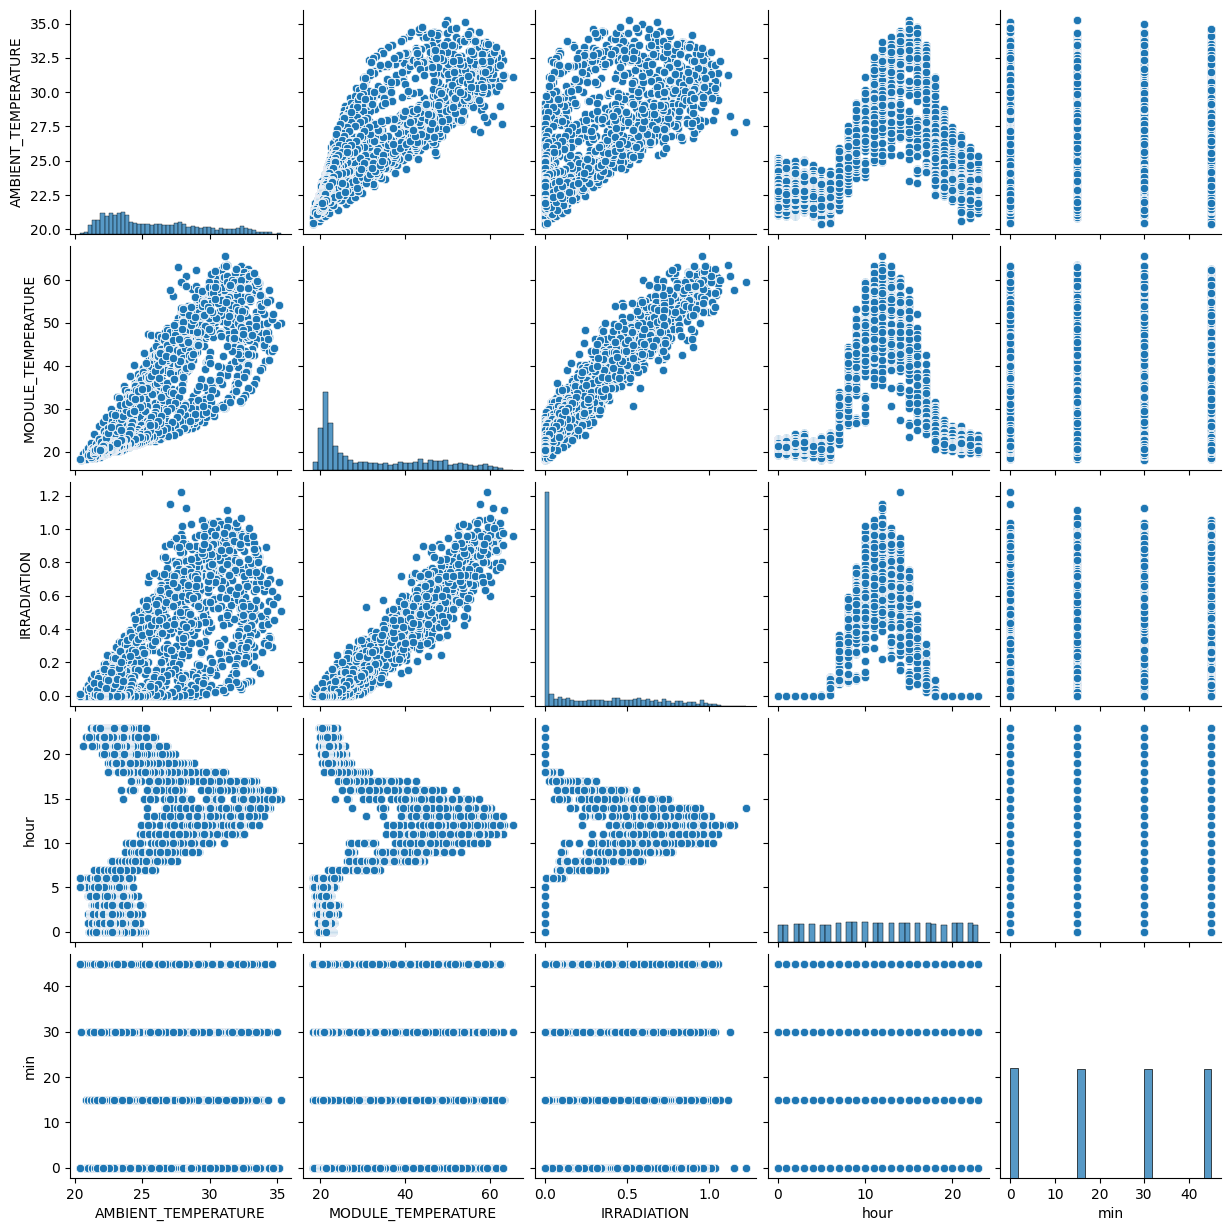

In [62]:
# Seaborn visualization library
import seaborn as sns
# Create the default pairplot
sns.pairplot(X)

# Feature Manipulation

In [63]:
cyclical = CyclicalFeatures(variables=['hour', 'min'], drop_original=True)
#display(X_train)
cyclical.fit(X_train)
X_train = cyclical.transform(X_train)
X_test = cyclical.transform(X_test)

display(X_train.head(), y_train)

,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,SOURCE_KEY,hour_sin,hour_cos,min_sin,min_cos
19883,-0.414164,-0.148314,0.144993,ih0vzX44oOqAx2f,0.942261,-0.334880,-2.449294e-16,1.0
3891,-0.491461,-0.810794,-0.773558,7JYdWkrLSPkdwr4,0.000000,1.000000,0.000000e+00,1.0
17244,-0.479905,-0.800226,-0.773558,WRmjgnKYAwPKWDb,0.269797,0.962917,8.660254e-01,-0.5
18433,2.103800,1.627939,1.441359,YxYtjZvoooNbGkE,-0.631088,-0.775711,-2.449294e-16,1.0
26162,0.002767,0.573704,0.687787,iCRJl6heRkivqQ3,0.816970,-0.576680,8.660254e-01,-0.5


19883    7.990026
3891     0.000000
17244    0.000000
18433    9.105063
26162    8.666770
           ...   
19183    0.000000
4180     0.000000
25773    0.000000
3491     0.000000
14100    9.110921
Name: DC_POWER, Length: 41112, dtype: float64

In [64]:
df = X_train.drop(['SOURCE_KEY'], axis=1)
features = X_train.drop(['SOURCE_KEY'], axis=1).columns

pca = PCA()
components = pca.fit_transform(df[features])
#X_train = (pd.DataFrame(components, columns = features))
#X_test = pd.DataFrame(pca.transform(X_test.drop(["SOURCE_KEY"], axis = 1)), columns = features)
#display(X_test)
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(2)
)
fig.update_traces(diagonal_visible=False)
fig.show()

# Model Training

In [67]:
model = Sequential()
model.add(Input(7, name="input"))
model.add(Dense(40, activation='tanh', name='layer1', kernel_initializer="glorot_uniform", kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4)))
model.add(Dropout(0.03))
model.add(Dense(30, activation='tanh', name='layer2'))
model.add(Dense(20, activation='relu', name='layer3'))
model.add(Dense(15, activation='relu', name='layer4'))
model.add(Dense(10, activation='relu', name='layer5'))
model.add(Dense(4, activation='relu', name='layer6'))
model.add(Dense(1, activation = 'linear'))

callback = tf.keras.callbacks.ModelCheckpoint(filepath='/content/drive/My Drive/Colab Notebooks/checkpoint/best_weights', save_weights_only=True, monitor='val_loss', mode='min', save_best_only=True)
model.compile(loss='mean_squared_error', optimizer='adam', metrics=tf.keras.metrics.MeanSquaredLogarithmicError())
history = model.fit(X_train.drop(['SOURCE_KEY'], axis = 1), y_train, epochs=80, batch_size=360, validation_split=0.1, callbacks=callback)



Epoch 1/80
103/103 [==============================] - 2s 5ms/step - loss: 19.4456 - mean_squared_logarithmic_error: 1.1223 - val_loss: 3.4264 - val_mean_squared_logarithmic_error: 0.2491
Epoch 2/80
103/103 [==============================] - 0s 3ms/step - loss: 1.5080 - mean_squared_logarithmic_error: 0.1415 - val_loss: 0.6896 - val_mean_squared_logarithmic_error: 0.0889
Epoch 3/80
103/103 [==============================] - 0s 3ms/step - loss: 0.5324 - mean_squared_logarithmic_error: 0.0578 - val_loss: 0.3812 - val_mean_squared_logarithmic_error: 0.0441
Epoch 4/80
103/103 [==============================] - 0s 3ms/step - loss: 0.3977 - mean_squared_logarithmic_error: 0.0399 - val_loss: 0.3033 - val_mean_squared_logarithmic_error: 0.0336
Epoch 5/80
103/103 [==============================] - 0s 3ms/step - loss: 0.3371 - mean_squared_logarithmic_error: 0.0332 - val_loss: 0.2768 - val_mean_squared_logarithmic_error: 0.0358
Epoch 6/80
103/103 [==============================] - 0s 4ms/step - l

#Model Architecture

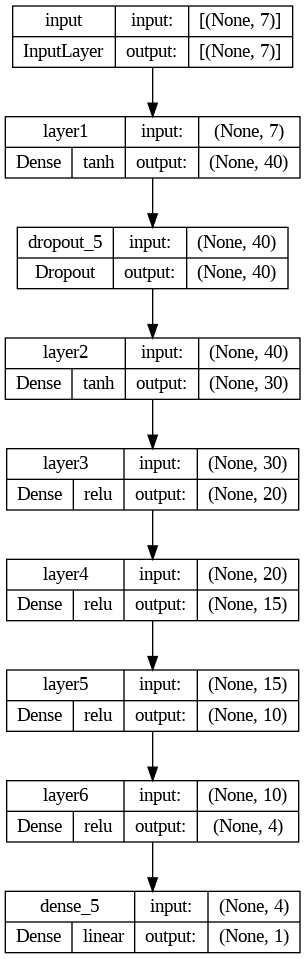

In [68]:
model.load_weights('/content/drive/My Drive/Colab Notebooks/checkpoint/best_weights')
#display(model.summary())
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True, show_layer_activations=True, expand_nested=True)

#Loss Plot

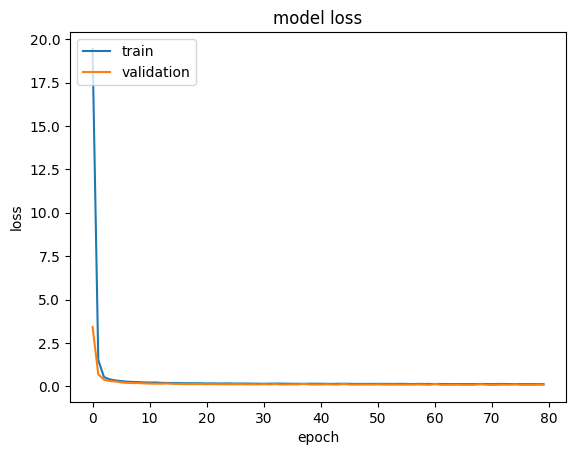

In [69]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#Running on a single test instance

In [75]:
#display(X_test)
vals = pd.DataFrame([[pd.to_datetime('2020-05-15 12:30:00'), '32.14768473',	'52.35325513',	'0.6492476293', 'HmiyD2TTLFNqkNe']], columns=('DATE_TIME', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION', 'SOURCE_KEY'))
#display(vals)
vals['hour'] = vals['DATE_TIME'].dt.hour
vals['min'] = vals['DATE_TIME'].dt.minute
vals = vals.drop(['DATE_TIME'], axis = 1)
display(vals)
vals[cols_to_scale] = scaler.transform(vals[cols_to_scale])
vals = cyclical.transform(vals)
vals = vals.drop(['SOURCE_KEY'], axis = 1)
#display(vals)
predicted_value = np.exp(model.predict(vals)) - 1
if predicted_value < 0:
  predicted_value = 0.0
display("DC_POWER Prediction for sample: " + str(predicted_value))

,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,SOURCE_KEY,hour,min
0,32.14768473,52.35325513,0.6492476293,HmiyD2TTLFNqkNe,12,30


1/1 [==============================] - 0s 17ms/step


'DC_POWER Prediction for sample: [[9156.537]]'

In [71]:
pred = model.predict(X_test.drop(['SOURCE_KEY'], axis = 1))
pred[pred < 0] = 0.0
mae = mean_absolute_error(y_test, pred)
print("Mean Absolute Error:", mae)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)
msle = mean_squared_log_error(y_test, pred)
print("Mean Squared Logarithmic Error:", msle)

143/143 [==============================] - 0s 1ms/step
Mean Absolute Error: 0.06452816164392079
Root Mean Squared Error: 0.23156423109615934
Mean Squared Logarithmic Error: 0.006170951231870666


# Significance Tests
Two tailed Student-T Test for y_test and pred with the number of samples in each being 4568 at a 95% significance level. We choose the T Test since population variance is unknown.

In [72]:
display("Size of samples: " + str(len(y_test)))
#Variance check for two tailed test
display("Variance of Predicted Samples: " + str(np.var(np.exp(pred) - 1)), "Variance of Ground Truth: " + str(np.var(np.exp(y_test)) - 1))
display("Standard Deviation of the Predicted Sample: " + str(np.exp(np.sqrt(np.var(pred)))))
#Ratio
display("Ratio to check for nearly equal Variance: " + str(np.var(pred)/np.var(y_test)))

'Size of samples: 4568'

'Variance of Predicted Samples: 15459836.0'

'Variance of Ground Truth: 16867028.96487056'

'Standard Deviation of the Predicted Sample: 67.162735'

'Ratio to check for nearly equal Variance: 0.9951730395611088'

In [73]:
#T-Test
#Equal Variance, hence equal_var = 'True'
tstat, t_pval = stats.ttest_ind(a=pred, b=y_test, equal_var=True)

display("T-Statistic: " + str(tstat.round(3)), "PValue: " + str(t_pval.round(3)))

'T-Statistic: [-0.043]'

'PValue: [0.966]'

With such a high P-value >> α=0.025, we cannot reject the null hypothesis, the means of the two samples are equal.